In [176]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd

## Import Datasets

In [2]:
# Customer Demographic
c_demo = pd.read_excel('/Users/eugicehan/Desktop/KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic', header = 1)
c_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
# Customer Address
c_add = pd.read_excel('/Users/eugicehan/Desktop/KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress', header = 1)
c_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [4]:
# Transactions
trans = pd.read_excel('/Users/eugicehan/Desktop/KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions', header = 1)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Data Pre-Processing

In [5]:
# Drop default column
c_demo.drop(['default'], axis =1, inplace = True)
c_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [6]:
# Replace inconsistent values
c_demo['gender'] = c_demo['gender'].replace(['F', 'Femal'],'Female').replace('M', 'Male').replace('U','Unspecified')
c_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [7]:
# Remove deceased customers
c_demo = c_demo[c_demo['deceased_indicator'] == 'N']
c_demo = c_demo.drop(['deceased_indicator'], axis = 1)

In [8]:
# Remove DOB outlier
c_demo = c_demo[c_demo['DOB'] != c_demo.DOB.min()]

In [9]:
c_demo_clean = c_demo.dropna()

In [10]:
c_demo_clean.head()
c_demo_clean.shape

(2777, 11)

In [11]:
# Add age column
c_demo_clean['age'] = (dt.datetime.now() - c_demo_clean['DOB'])/np.timedelta64(1,'Y')
c_demo_clean['age'] = c_demo_clean['age'].astype(int)
c_demo_clean['age_class'] = ((round(c_demo_clean['age']/10))*10).astype(int)
c_demo_clean.head()

<ipython-input-11-421a4a16e083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_demo_clean['age'] = (dt.datetime.now() - c_demo_clean['DOB'])/np.timedelta64(1,'Y')
<ipython-input-11-421a4a16e083>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_demo_clean['age'] = c_demo_clean['age'].astype(int)
<ipython-input-11-421a4a16e083>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,67,70
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8.0,48,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20.0,32,30


In [12]:
c_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [13]:
c_add['state'] = c_add['state'].replace('New South Wales', 'NSW').replace('Victoria', 'VIC')
c_add['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [14]:
c_add_clean = c_add.dropna()
c_add_clean.shape

(3999, 6)

In [15]:
# Merge 2 datasets
customer_demographic_add = pd.merge(c_demo_clean, c_add_clean, on = 'customer_id')
customer_demographic_add.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67,70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40,40,6 Meadow Vale Court,2153,NSW,Australia,10
2,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8.0,48,50,97736 7th Trail,2023,NSW,Australia,12
3,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,No,8.0,27,30,44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,Gabriele,Norcross,Male,38,1955-02-15,Developer I,Financial Services,High Net Worth,Yes,8.0,66,70,2 Sutherland Street,3799,VIC,Australia,6


In [16]:
customer_demographic_add.shape

(2775, 18)

In [17]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [18]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [19]:
trans_clean = trans.dropna()
trans_clean.shape

(19445, 13)

In [20]:
# Add Recency column
most_recent_purchase = trans_clean['transaction_date'].max()
trans_clean['recency'] = (most_recent_purchase - trans_clean['transaction_date'])/np.timedelta64(1,'D')
trans_clean.head()

<ipython-input-20-ef5ab70fdb50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_clean['recency'] = (most_recent_purchase - trans_clean['transaction_date'])/np.timedelta64(1,'D')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,308.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,223.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,75.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,121.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,90.0


In [21]:
# Add profit column
trans_clean['profit'] = trans_clean['list_price'] - trans_clean['standard_cost']
trans_clean.head()

<ipython-input-21-c4cd8e379aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_clean['profit'] = trans_clean['list_price'] - trans_clean['standard_cost']


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,recency,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,308.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,223.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,75.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,121.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,90.0,1055.82


In [22]:
trans_clean[trans_clean['recency'] > 365].shape

(0, 15)

## RFM Model

In [23]:
# Identify RFM data
rfm_data = trans_clean.groupby('customer_id').agg({
    'recency': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfm_table = rfm_data.rename(columns = {
    'customer_id': 'frequency',
    'profit': 'monetary_value'
})

rfm_table.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,7,3290.21
4,195.0,2,220.57
5,16.0,6,2394.94


In [24]:
rfm_table.shape

(3492, 3)

In [25]:
# Identify RFM Score
quartiles = rfm_table.quantile(q=[0.25, 0.50, 0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [26]:
# customers who made a purchases more recent should have higher score
def RecencyEncoder(x,p,d):
    if x <= d[p][0.25]:
        return 1
    if x <= d[p][0.50]:
        return 2
    if x <= d[p][0.75]:
        return 3
    else:
        return 4

# customers who made transactions more frequent with higher monetary_value have higher score
def FMEncoder(x,p,d):
    if x <= d[p][0.25]:
        return 4
    if x <= d[p][0.50]:
        return 3
    if x <= d[p][0.75]:
        return 2
    else:
        return 1

In [27]:
rfm_table['R-score'] = rfm_table['recency'].apply(RecencyEncoder, args=('recency',quartiles))
rfm_table['F-score'] = rfm_table['frequency'].apply(FMEncoder, args=('frequency',quartiles))
rfm_table['M-score'] = rfm_table['monetary_value'].apply(FMEncoder, args=('monetary_value',quartiles))
rfm_table.head()

,recency,frequency,monetary_value,R-score,F-score,M-score
customer_id,,,,,,
1,7.0,11,3018.09,1,1,2
2,128.0,3,2226.26,4,4,3
3,102.0,7,3290.21,4,2,2
4,195.0,2,220.57,4,4,4
5,16.0,6,2394.94,1,2,3


In [28]:
rfm_table['RFM_value'] = rfm_table['R-score']+ rfm_table['F-score'] + rfm_table['M-score']
rfm_table['RFM_class'] = 100*rfm_table['R-score'] + 10*rfm_table['F-score'] + rfm_table['M-score']
rfm_table.head()

,recency,frequency,monetary_value,R-score,F-score,M-score,RFM_value,RFM_class
customer_id,,,,,,,,
1,7.0,11,3018.09,1,1,2,4,112
2,128.0,3,2226.26,4,4,3,11,443
3,102.0,7,3290.21,4,2,2,8,422
4,195.0,2,220.57,4,4,4,12,444
5,16.0,6,2394.94,1,2,3,6,123


In [29]:
rfm_quantiles = (rfm_table['RFM_class'].min(), rfm_table['RFM_class'].quantile(q=0.25),
                rfm_table['RFM_class'].median(),rfm_table['RFM_class'].quantile(q=0.75),
                rfm_table['RFM_class'].max())
rfm_quantiles

(111, 144.0, 244.0, 344.0, 444)

In [30]:
def RFMClassEncoder(x,p,d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x<= d[2]:
        return 'bronze'
    else:
        return 'standard'

In [31]:
rfm_table['Customer_Title']=rfm_table['RFM_class'].apply(RFMClassEncoder, args=('RFM_class',rfm_quantiles))
rfm_table

,recency,frequency,monetary_value,R-score,F-score,M-score,RFM_value,RFM_class,Customer_Title
customer_id,,,,,,,,,
1,7.0,11,3018.090000,1,1,2,4,112,silver
2,128.0,3,2226.260000,4,4,3,11,443,standard
3,102.0,7,3290.210000,4,2,2,8,422,standard
4,195.0,2,220.570000,4,4,4,12,444,standard
5,16.0,6,2394.940000,1,2,3,6,123,silver
...,...,...,...,...,...,...,...,...,...
3497,52.0,3,1648.320000,3,4,4,11,344,standard
3498,127.0,6,3147.330000,4,2,2,8,422,standard
3499,51.0,7,4955.250000,3,2,1,6,321,standard


In [32]:
rfm_table['Customer_Title'].value_counts()

standard    1728
bronze       857
silver       737
gold         170
Name: Customer_Title, dtype: int64

#### Merge three datasets

In [33]:
full_data = pd.merge(rfm_table, customer_demographic_add, how='inner',on='customer_id')
full_data.head()

,customer_id,recency,frequency,monetary_value,R-score,F-score,M-score,RFM_value,RFM_class,Customer_Title,...,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
0,1,7.0,11,3018.09,1,1,2,4,112,silver,...,Mass Customer,Yes,11.0,67,70,060 Morning Avenue,2016,NSW,Australia,10
1,2,128.0,3,2226.26,4,4,3,11,443,standard,...,Mass Customer,Yes,16.0,40,40,6 Meadow Vale Court,2153,NSW,Australia,10
2,9,78.0,6,2353.11,3,2,3,8,323,standard,...,Affluent Customer,Yes,8.0,48,50,97736 7th Trail,2023,NSW,Australia,12
3,12,67.0,7,3540.03,3,2,2,7,322,standard,...,Mass Customer,No,8.0,27,30,44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,27.0,7,4337.38,2,2,1,5,221,bronze,...,High Net Worth,Yes,8.0,66,70,2 Sutherland Street,3799,VIC,Australia,6


In [34]:
full_data.shape

(2445, 27)

<AxesSubplot:xlabel='RFM_value'>

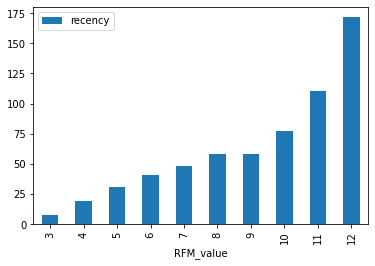

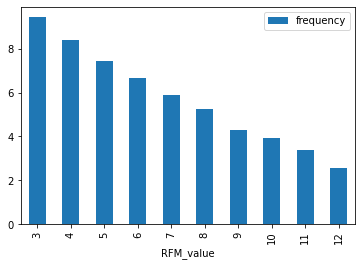

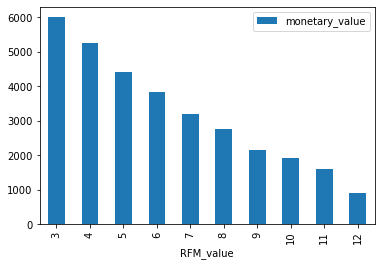

In [35]:
full_data.groupby('RFM_value').agg('recency').mean().to_frame().plot(kind='bar')
full_data.groupby('RFM_value').agg('frequency').mean().to_frame().plot(kind='bar')
full_data.groupby('RFM_value').agg('monetary_value').mean().to_frame().plot(kind='bar')

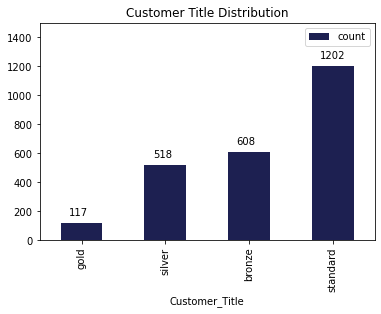

In [184]:
customer_titles_df = full_data.groupby('Customer_Title').agg(
    {'RFM_class': lambda x : len(x)})
customer_titles_df.rename(columns={'RFM_class' : 'count'}, inplace=True)
c_titles_sorted = customer_titles_df.sort_values('count')
c_titles_sorted.plot(kind='bar', color = '#1d2051')

for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1500])

plt.title('Customer Title Distribution')
plt.show()

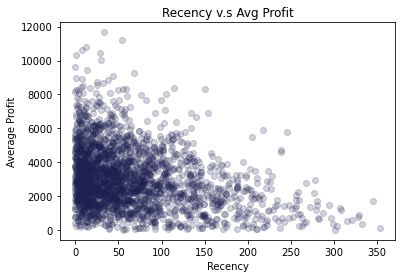

In [185]:
plt.scatter(full_data['recency'], full_data['monetary_value'], color = '#1d2051',alpha = 0.2)
plt.title('Recency v.s Avg Profit')
plt.xlabel('Recency')
plt.ylabel('Average Profit')
plt.show()

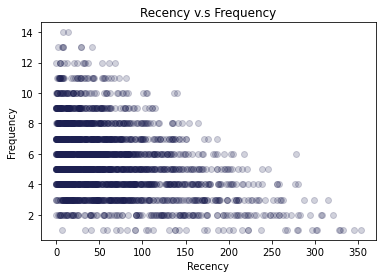

In [186]:
plt.scatter(full_data['recency'], full_data['frequency'], color='#1d2051',alpha = 0.2)
plt.title('Recency v.s Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

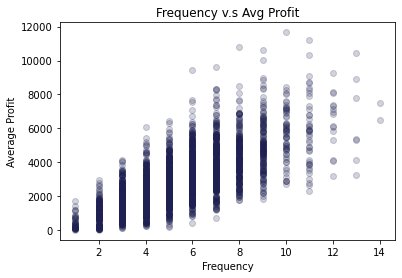

In [187]:
plt.scatter(full_data['frequency'],full_data['monetary_value'], color='#1d2051',alpha=0.2)
plt.title('Frequency v.s Avg Profit')
plt.xlabel('Frequency')
plt.ylabel('Average Profit')
plt.show()

## Import New Customer Dataset

In [40]:
new_customer = pd.read_excel('/Users/eugicehan/Desktop/KPMG Virtual Internship/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', header = 1)
new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.02,1.275,1.59375,1.354688,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.10,1.100,1.37500,1.168750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.65,0.650,0.65000,0.650000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.08,1.350,1.35000,1.350000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.06,1.060,1.32500,1.325000,4,4,1.703125


In [41]:
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [42]:
new_customer = new_customer.drop(['Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis =1)
new_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [43]:
new_customer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [44]:
new_customer.duplicated().sum()

0

In [45]:
new_customer_clean = new_customer.dropna()
new_customer_clean.shape

(715, 18)

In [46]:
new_customer_clean['deceased_indicator'].value_counts()

N    715
Name: deceased_indicator, dtype: int64

In [47]:
new_customer_clean['gender'].value_counts()

Female    369
Male      346
Name: gender, dtype: int64

In [48]:
new_customer_clean['gender'].replace('U','Unspecified')

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
995      Male
996      Male
997    Female
998      Male
999      Male
Name: gender, Length: 715, dtype: object

In [49]:
new_customer_clean['DOB'].sort_values()

797   1938-06-08
885   1938-06-09
585   1938-08-30
191   1938-10-16
18    1938-11-09
         ...    
569   2001-09-27
996   2001-10-17
475   2001-12-29
763   2002-01-04
396   2002-01-17
Name: DOB, Length: 715, dtype: datetime64[ns]

In [50]:
new_customer_clean.drop(['deceased_indicator'], axis=1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [51]:
new_customer_clean['age'] = (dt.datetime.now() - new_customer_clean['DOB']) / np.timedelta64(1,'Y')
new_customer_clean['age'] = round(new_customer_clean['age'])
new_customer_clean['age_class'] = ((round(new_customer_clean['age'] / 10)) * 10).astype(int)
new_customer_clean.head()

<ipython-input-51-051ff3710529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_clean['age'] = (dt.datetime.now() - new_customer_clean['DOB']) / np.timedelta64(1,'Y')
<ipython-input-51-051ff3710529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_customer_clean['age'] = round(new_customer_clean['age'])
<ipython-input-51-051ff3710529>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64.0,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51.0,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47.0,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43.0,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56.0,60


## Data Exploration 

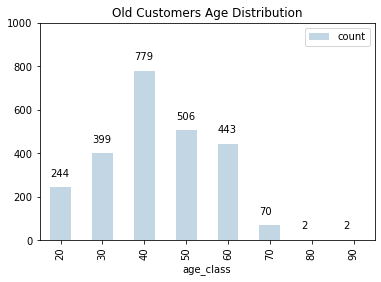

In [158]:
# Customers Age Distribution
old_age_dist = full_data.groupby('age_class').agg({
    'age_class': lambda x: len(x)})

old_age_dist.rename(columns={'age_class':'count'}, inplace = True)

old_age_dist.plot(kind='bar', color='#c3d6e4')

for i, v in enumerate(old_age_dist['count']):
    plt.text(i - .25, v + 50, int(v), color='black')

axes = plt.gca()
axes.set_ylim([0, 1000])

plt.title('Old Customers Age Distribution')
plt.show()

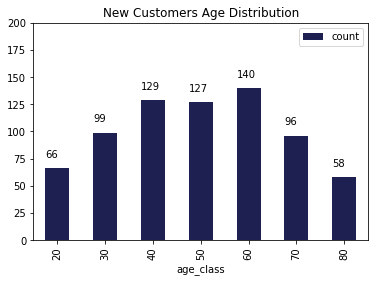

In [157]:
new_age_dist = new_customer_clean.groupby('age_class').agg({
    'age_class': lambda x: len(x)})

new_age_dist.rename(columns={'age_class':'count'}, inplace = True)

new_age_dist.plot(kind='bar', color='#1d2051')

for i, v in enumerate(new_age_dist['count']):
    plt.text(i - .25, v + 10, int(v), color='black')

axes = plt.gca()
axes.set_ylim([0, 200])

plt.title('New Customers Age Distribution')
plt.show()

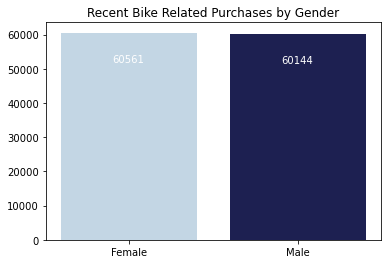

In [156]:
# Bike purchases by Gender
bike_gender = full_data.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
labels = ['Female', 'Male']
plt.bar(labels, bike_gender['count'], color = ['#c3d6e4','#1d2051'])

for x, y in enumerate(bike_gender['count']):
    plt.text(x - .1, y - 8500, y, color = 'white')

plt.title('Recent Bike Related Purchases by Gender')
plt.show()

## bike_gender_p = bike_gender/bike_gender.sum()
bike_gender_p

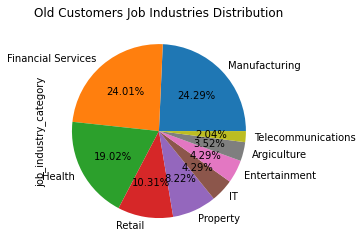

In [93]:
# Job industries distribution
full_data['job_industry_category'].value_counts().plot(kind='pie', autopct = lambda pct: str(round(pct, 2))+'%')

plt.title('Old Customers Job Industries Distribution')
plt.show()

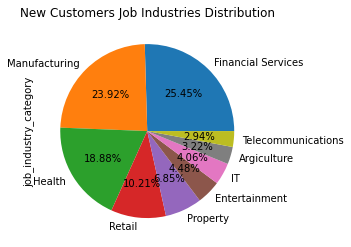

In [96]:
new_customer_clean['job_industry_category'].value_counts().plot(kind='pie', autopct = lambda pct: str(round(pct,2))+'%')
plt.title('New Customers Job Industries Distribution')
plt.show()

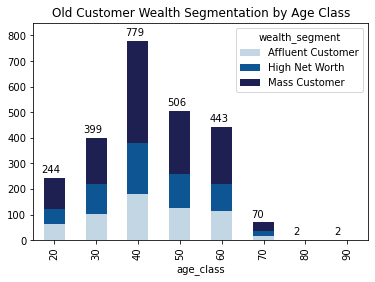

In [174]:
# Wealth Segmentation by age_class
old_age_wealth = full_data.groupby('age_class')['wealth_segment'].value_counts().unstack(level=1).plot(kind='bar', stacked=True, color = ['#c3d6e4','#0e5593','#1d2051'])

for i, v in enumerate(full_data.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .3, v + 20, int(v), color='black')

axes = plt.gca()
axes.set_ylim([0, 850])
plt.title('Old Customer Wealth Segmentation by Age Class')
plt.show()


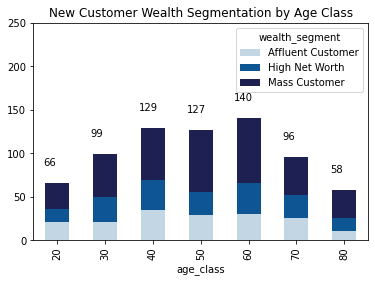

In [152]:
new_age_wealth = new_customer_clean.groupby('age_class')['wealth_segment'].value_counts().unstack(level=1).plot(kind='bar', stacked=True, color=['#c3d6e4','#0e5593','#1d2051'])

for i, v in enumerate(new_customer_clean.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .3, v + 20, int(v), color='black')

axes = plt.gca()
axes.set_ylim([0, 250])
plt.title('New Customer Wealth Segmentation by Age Class')
plt.show()


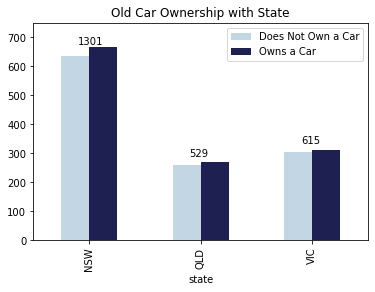

In [160]:
# Car Ownership by State
full_data.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False, color=['#c3d6e4','#1d2051'])
for i, v in enumerate(full_data.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 750])

plt.title('Old Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

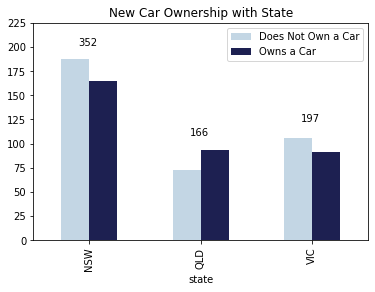

In [165]:
new_customer_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False,color=['#c3d6e4','#1d2051'])

for i, v in enumerate(new_customer_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')

axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()

In [162]:
full_data['customer_segment'] = full_data['RFM_value'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
full_data

,customer_id,recency,frequency,monetary_value,R-score,F-score,M-score,RFM_value,RFM_class,Customer_Title,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
0,1,7.0,11,3018.09,1,1,2,4,112,silver,...,Yes,11.0,67,70,060 Morning Avenue,2016,NSW,Australia,10,Very Loyal
1,2,128.0,3,2226.26,4,4,3,11,443,standard,...,Yes,16.0,40,40,6 Meadow Vale Court,2153,NSW,Australia,10,Inactive
2,9,78.0,6,2353.11,3,2,3,8,323,standard,...,Yes,8.0,48,50,97736 7th Trail,2023,NSW,Australia,12,High Risk
3,12,67.0,7,3540.03,3,2,2,7,322,standard,...,No,8.0,27,30,44339 Golden Leaf Alley,4557,QLD,Australia,4,Average
4,13,27.0,7,4337.38,2,2,1,5,221,bronze,...,Yes,8.0,66,70,2 Sutherland Street,3799,VIC,Australia,6,Becoming Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,3493,93.0,6,3728.88,4,2,2,8,422,standard,...,No,18.0,57,60,3 Monument Crossing,2090,NSW,Australia,10,High Risk
2441,3494,4.0,4,2755.11,1,4,3,8,143,silver,...,No,1.0,22,20,35 Chive Alley,2033,NSW,Australia,10,High Risk
2442,3495,13.0,7,3847.65,1,2,2,5,122,silver,...,No,8.0,34,30,1 Dayton Park,2767,NSW,Australia,9,Becoming Loyal
2443,3496,256.0,4,2045.84,4,4,3,11,443,standard,...,Yes,19.0,35,40,2565 Caliangt Point,2171,NSW,Australia,9,Inactive


In [169]:
top_1000 = full_data.sort_values('RFM_class').head(1000)
top_1000

,customer_id,recency,frequency,monetary_value,R-score,F-score,M-score,RFM_value,RFM_class,Customer_Title,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
1105,1558,8.0,9,10640.30,1,1,1,3,111,gold,...,No,2.0,30,30,07236 Jenifer Point,2763,NSW,Australia,10,Platinum
2032,2879,14.0,8,5572.11,1,1,1,3,111,gold,...,Yes,5.0,47,50,77433 Sunfield Court,3179,VIC,Australia,9,Platinum
2033,2880,18.0,8,4772.56,1,1,1,3,111,gold,...,No,7.0,53,50,8647 La Follette Court,2067,NSW,Australia,9,Platinum
1037,1460,12.0,8,10787.60,1,1,1,3,111,gold,...,Yes,13.0,48,50,25 Darwin Terrace,2207,NSW,Australia,9,Platinum
255,346,12.0,9,6420.70,1,1,1,3,111,gold,...,No,3.0,40,40,44621 Linden Drive,2155,NSW,Australia,10,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,3278,22.0,5,3216.13,2,3,2,7,232,bronze,...,No,9.0,39,40,31601 Birchwood Court,4105,QLD,Australia,8,Average
928,1314,27.0,5,2894.17,2,3,2,7,232,bronze,...,Yes,6.0,51,50,210 Esch Park,2452,NSW,Australia,8,Average
2207,3132,23.0,5,3426.54,2,3,2,7,232,bronze,...,Yes,7.0,46,50,33794 Sommers Crossing,2502,NSW,Australia,6,Average
430,588,19.0,5,3603.85,2,3,2,7,232,bronze,...,No,11.0,57,60,62 Cherokee Terrace,2630,NSW,Australia,1,Average


In [172]:
customer_distribution = full_data['customer_segment'].value_counts()
customer_distribution

Average           320
Recent            308
Evasive           288
High Risk         278
Becoming Loyal    255
Losing            246
Lost              218
Very Loyal        210
Inactive          205
Platinum          117
Name: customer_segment, dtype: int64

In [183]:
writer = pd.ExcelWriter('/Users/eugicehan/Desktop/KPMG Virtual Internship/Task 2/KPMG_VI_New_raw_data_update_final.xlsx',
                        engine = 'xlsxwriter')
full_data.to_excel(writer, sheet_name = 'Dataset')
new_customer_clean.to_excel(writer, sheet_name = 'NewCustomerClean')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()

/Users/eugicehan/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
